# Lecture 14 : Independent Component Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The following notebook uses the speech-music separation example from https://cnl.salk.edu/~tewon/blind_audio.html.

## Load and inspect the first audio file

In [2]:
from scipy.io import wavfile

In [3]:
rate, signal_1 = wavfile.read('audio/rsm2_mA.wav')
rate, signal_1.shape

(16000, (110000,))

This signal has 110,000 samples with a sampling rate of 16,000 samples/second, which means its length in seconds is:

In [4]:
signal_1.shape[0]/rate

6.875

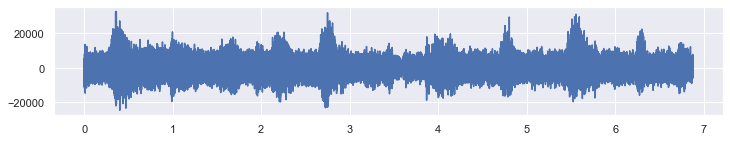

In [5]:
time = np.arange(signal_1.shape[0])/rate
plt.figure(figsize=(12,2))
plt.plot(time, signal_1)

In [6]:
import IPython.display as ipd
ipd.Audio(signal_1, rate=rate)

In [49]:
s2 = np.sign(np.sin(3 * time))

from scipy.signal import sawtooth
s3 = 20000 * sawtooth(2 * np.pi * time) + 0.01 * np.random.normal(size=time.shape)

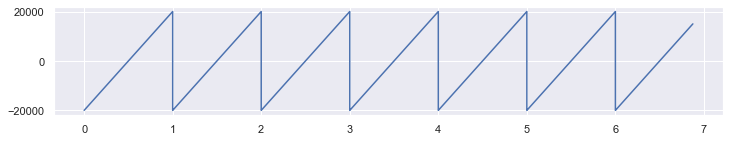

In [50]:
plt.figure(figsize=(12,2))
plt.plot(time, s3)

In [51]:
ipd.Audio(s3, rate=rate)

In [52]:
A = np.array([[1,1],[0.5,2]])

X = np.dot(np.c_[signal_1, s3], A.T)
X.shape

(110000, 2)

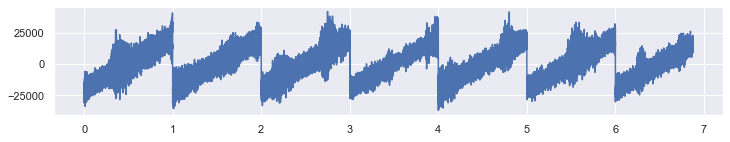

In [53]:
plt.figure(figsize=(12,2))
plt.plot(time, X[:,0])

In [54]:
ipd.Audio(X[:,0], rate=rate)

In [55]:
ipd.Audio(X[:,1], rate=rate)

## Combine signals into DataFrame

In [56]:
X = pd.DataFrame({'A': X[:,0], 'B': X[:,1], 'time': time}).set_index('time')
X.shape

(110000, 2)

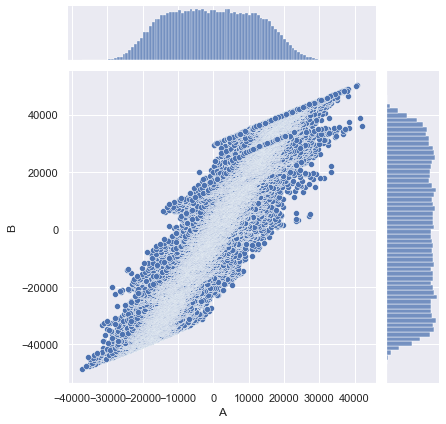

In [57]:
sns.jointplot(x='A', y='B', data=X.astype('float'))

In [58]:
from sklearn.decomposition import FastICA

In [59]:
ica = FastICA(n_components=2, algorithm='deflation') # Initialize transformation object

ica.fit(X)                    # Fit transformation

separated = ica.transform(X)  # Apply transformation

In [60]:
separated.shape

(110000, 2)

## Inspect first separated source

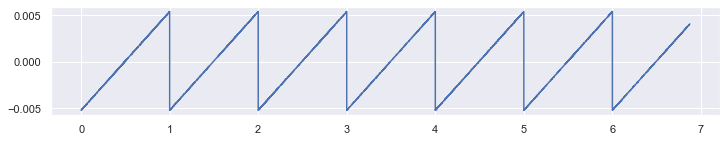

In [61]:
plt.figure(figsize=(12,2))
plt.plot(time, separated[:,0])

In [62]:
ipd.Audio(separated[:,0], rate=rate)

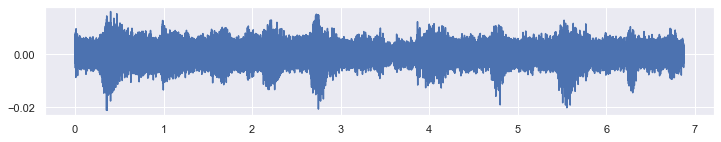

In [63]:
plt.figure(figsize=(12,2))
plt.plot(time, separated[:,1])

In [64]:
ipd.Audio(separated[:,1], rate=rate)

# Direct approach


In [65]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
Xw = pca.fit_transform(X)

/Users/akem134/opt/anaconda3/envs/dslab_712/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


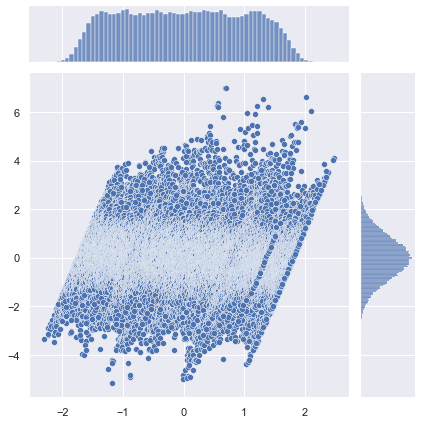

In [66]:
# Scatter plot reveals hidden dependencies
sns.jointplot(Xw[:,0], Xw[:, 1])

In [67]:
from scipy.stats import entropy

def entropysimilarity(phi, Xw):
    theta = np.radians(phi)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s],[s, c]])
    X_prime = np.dot(Xw,R)
    hist0, bins = np.histogram(X_prime[:,0], bins=1000)
    hist1, bins = np.histogram(X_prime[:,1], bins=1000)
    similarity = -entropy(hist0+1e-6, hist1+1e-6)
    return similarity

In [68]:
entropysimilarity(90, Xw)

-0.7639298709580961

In [69]:
phi = np.linspace(0,180, 100)
entsim = [entropysimilarity(p, Xw) for p in phi]

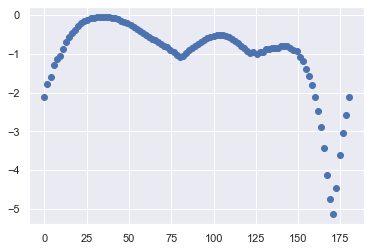

In [70]:
plt.plot(phi, entsim, 'o')

In [71]:
from scipy.optimize import fminbound
fminbound(entropysimilarity, 150, 180.0, args=(Xw,), xtol=1e-5, maxfun=500)

170.5277819645394

In [74]:
phi = np.linspace(150,180, 500)
entsim = [entropysimilarity(p, Xw) for p in phi]

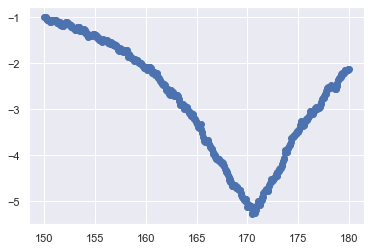

In [75]:
plt.plot(phi, entsim, 'o')

In [76]:
phi = 170.44557012347028
theta = np.radians(phi)
c, s = np.cos(theta), np.sin(theta)
R = np.array([[c, -s],[s, c]])
X_ind = np.dot(Xw,R)

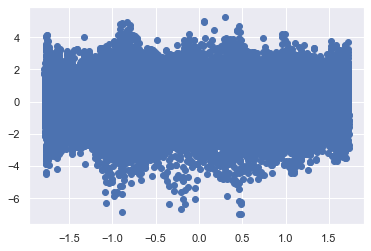

In [77]:
plt.scatter(X_ind[:,0], X_ind[:,1])

In [78]:
ipd.Audio(X_ind[:,0], rate=rate)

In [35]:
ipd.Audio(X_ind[:,1], rate=rate)